In [50]:
library(BioStatR)
library(dplyr)
library(igraph)
library(geosphere)
library(ggplot2)
library(hexbin)

In [51]:
# Load the data
files <- list.files("../../data/task_44/networks")
files <- files[grep("^[A-Za-z]{3}_nodes.csv$|^[A-Za-z]{3}_edges.csv$", files)]
countries <- unique(sub("_nodes.csv$|_edges.csv$", "", files))

In [52]:
country <- sample(countries, 1) # To be replaced with a loop over all countries
print(country)

# Load and select nodes and edges
nodes <- read.csv(paste0("../../data/task_44/networks/", country, "_nodes.csv"))
nodes <- nodes |> select(nodeID, longitude, latitude)
edges <- read.csv(paste0("../../data/task_44/networks/", country, "_edges.csv"))
edges <- edges |> filter(nodeID_from >= nodeID_to) |> select(nodeID_from, nodeID_to, weight)

[1] "TGO"


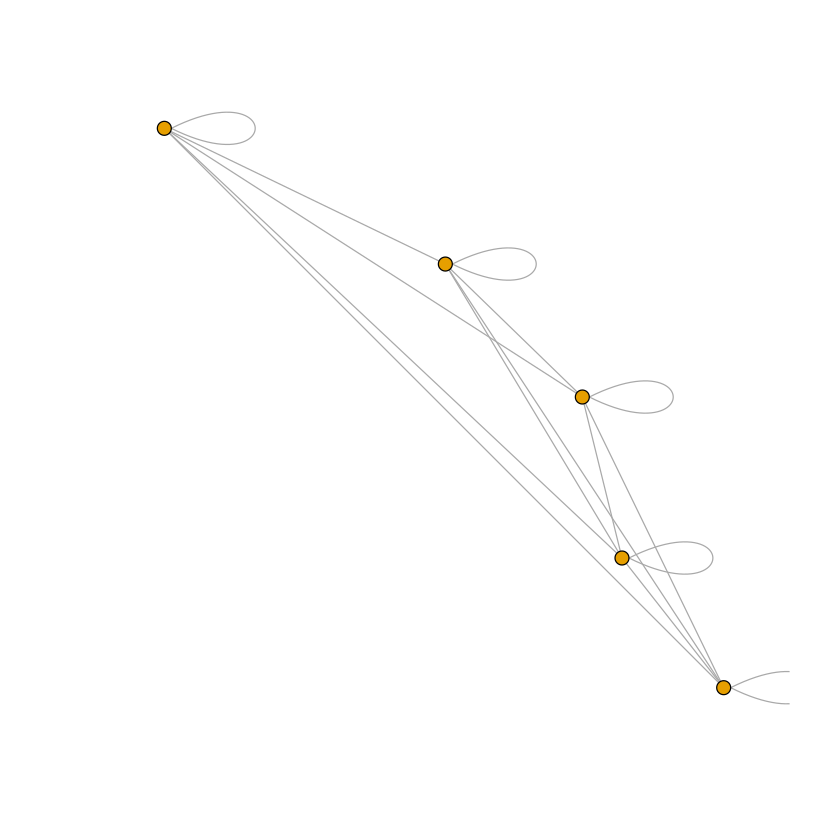

In [53]:
# Create the graph
g <- graph_from_data_frame(edges, directed = FALSE, vertices = nodes)

layout <- matrix(c(nodes$longitude, nodes$latitude), ncol = 2, byrow = FALSE)
plot(g, layout = layout, vertex.size = 5, vertex.label = NA, edge.arrow.size = 0)

In [54]:
# Extract analytics from the graph
n_nodes <- vcount(g)
diameter <- diameter(g) # equal to 1 for complete graphs
betweenness(g, directed = FALSE, weights = E(g)$weight)
transitivity(g, type = "weighted")
diversity(g, weights=E(g)$weight)
mean_distance(g,weights = E(g)$weights)

1 2 3 4 5 
0 0 1 1 0

1        2        3        4        5 
1.041675 1.063146 1.186840 1.054519 1.031062

1         2         3         4         5 
0.6556434 0.7493378 0.9917192 0.7180710 0.6046182

[1] 700499.3

In [55]:
countries

[1] "AGO" "ALB" "ARE" "ARG" "ARM" "AUS" "AUT" "AZE" "BDI" "BEL" "BEN" "BFA"
 [13] "BGD" "BGR" "BHR" "BIH" "BLR" "BOL" "BRA" "BWA" "CAF" "CAN" "CHE" "CHL"
 [25] "CIV" "CMR" "COD" "COG" "COL" "CRI" "CYP" "CZE" "DEU" "DNK" "DOM" "DZA"
 [37] "ECU" "EGY" "ERI" "ESP" "EST" "ETH" "FIN" "FRA" "GAB" "GBR" "GEO" "GHA"
 [49] "GIN" "GMB" "GNB" "GNQ" "GRC" "GTM" "HKG" "HND" "HRV" "HTI" "HUN" "IDN"
 [61] "IND" "IRL" "ISL" "ITA" "JAM" "JOR" "JPN" "KAZ" "KEN" "KGZ" "KHM" "KOR"
 [73] "KWT" "LAO" "LBN" "LBR" "LBY" "LIE" "LKA" "LSO" "LTU" "LUX" "LVA" "MAR"
 [85] "MDA" "MDG" "MEX" "MKD" "MLI" "MLT" "MMR" "MNE" "MNG" "MOZ" "MRT" "MUS"
 [97] "MWI" "MYS" "NAM" "NER" "NGA" "NIC" "NLD" "NOR" "NPL" "NZL" "OMN" "PAK"
[109] "PAN" "PER" "PHL" "PNG" "POL" "PRT" "PRY" "QAT" "ROU" "RWA" "SAU" "SEN"
[121] "SGP" "SLE" "SLV" "SRB" "SVK" "SVN" "SWE" "SWZ" "TCD" "TGO" "THA" "TJK"
[133] "TLS" "TTO" "TUN" "TUR" "TWN" "TZA" "UGA" "UKR" "URY" "UZB" "VNM" "XKO"
[145] "ZAF" "ZMB" "ZWE"

In [60]:
res <- data.frame()

for (country in countries){
  # Load and select nodes and edges
  nodes <- read.csv(paste0("../../data/task_44/networks/", country, "_nodes.csv"))
  nodes <- nodes |> select(nodeID, longitude, latitude)
  edges <- read.csv(paste0("../../data/task_44/networks/", country, "_edges.csv"))
  edges <- edges |> filter(nodeID_from >= nodeID_to) |> select(nodeID_from, nodeID_to, weight)

  # Create the graph
  g <- graph_from_data_frame(edges, directed = FALSE, vertices = nodes)

  n_nodes <- vcount(g)
  diameter <- diameter(g) # equal to 1 for complete graphs
  betweenness <- mean(betweenness(g, directed = FALSE, weights = E(g)$weight))
  clustering <- mean(transitivity(g, type = "weighted"))
  entropy <- mean(diversity(g, weights = E(g)$weights))
  mean_dist <- mean_distance(g,weights = E(g)$weights)
  

  res <- rbind(res, 
         data.frame(country = country, n_nodes = n_nodes, 
                    diameter = diameter, betweenness = betweenness, 
                    clustering = clustering, entropy = entropy, mean_dist = mean_dist))
  
}

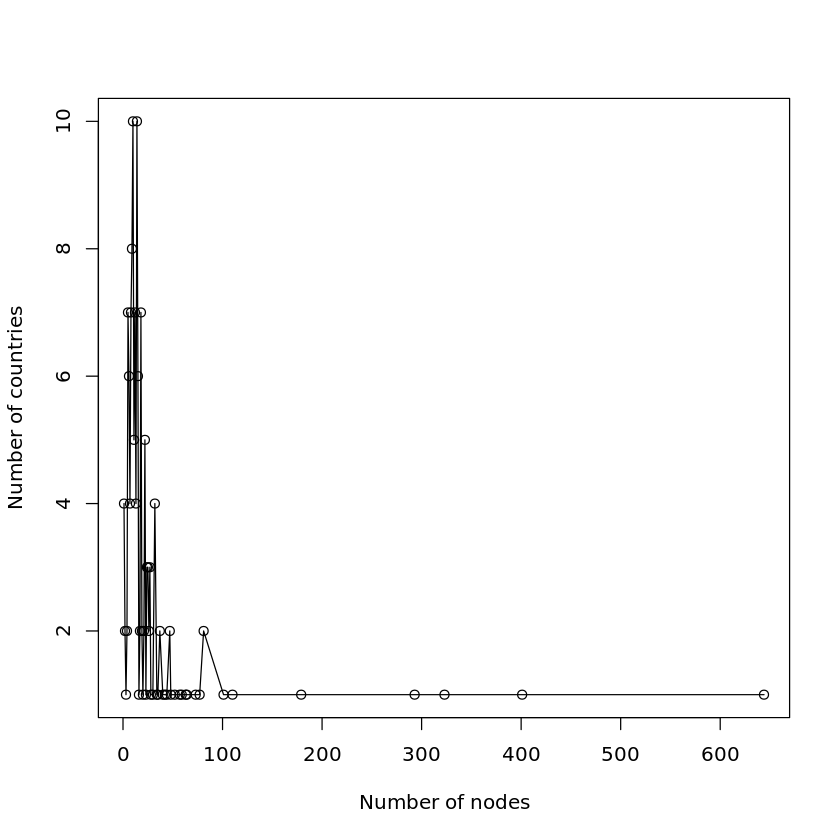

In [61]:
nodes_count <- res |> group_by(n_nodes) |> summarise(count = n())

plot(nodes_count$n_nodes, nodes_count$count, type = "o", xlab = "Number of nodes", ylab = "Number of countries")

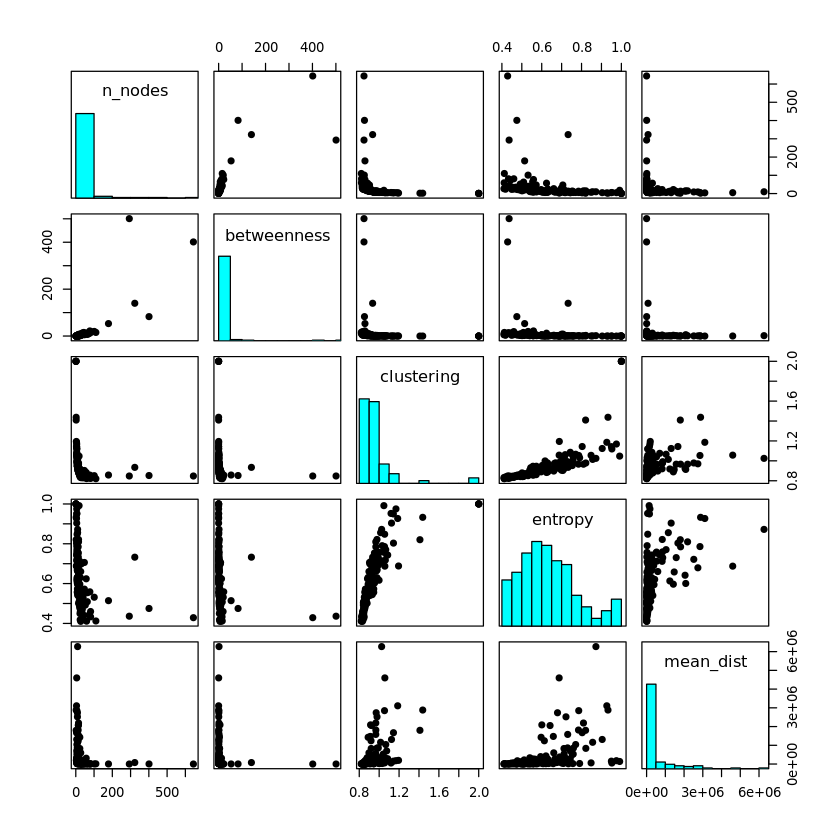

In [62]:
pairs(res |> select(-country, -diameter), pch = 19, diag.panel =  panel.hist)

## Full world 

In [2]:
edges <- read.csv("../../data/task_44/networks/full_world_edges.csv")
nodes <- read.csv("../../data/task_44/networks/full_world_nodes.csv")

In [3]:
head(nodes)

,nodeID,nodeCode,level,country_ISO3,nodeLabel,longitude,latitude
,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,1,DZA1,gadm1,DZA,Adrar,-0.6198861,26.01378
2,2,DZA2,gadm1,DZA,Aïn Defla,2.0669765,36.18434
3,3,DZA3,gadm1,DZA,Aïn Témouchent,-1.0554878,35.35085
4,4,DZA4,gadm1,DZA,Alger,3.0566231,36.70560
5,5,DZA5,gadm1,DZA,Annaba,7.5429461,36.83824
6,6,DZA6,gadm1,DZA,Batna,5.8745511,35.41969


In [4]:
tail(edges)

,nodeID_from,nodeID_to,weight
,<int>,<int>,<int>
62948351,1836,1831,318504
62948352,1836,1832,305709
62948353,1836,1833,365478
62948354,1836,1834,715880
62948355,1836,1835,722214
62948356,1836,1836,15475362


In [5]:
edges_dist <- edges |>
  inner_join(nodes, by = c("nodeID_from" = "nodeID")) |>
  rename(latitude_from = latitude, longitude_from = longitude) |>
  select(nodeID_from, nodeID_to, weight, latitude_from, longitude_from) |>
  inner_join(nodes, by = c("nodeID_to" = "nodeID")) |>
  rename(latitude_to = latitude, longitude_to = longitude) |>
  select(nodeID_from, nodeID_to, weight, latitude_from, longitude_from, latitude_to, longitude_to) |>
  mutate(distance = distHaversine(cbind(longitude_from, latitude_from), cbind(longitude_to, latitude_to))) |>
  select(-latitude_from, -longitude_from, -latitude_to, -longitude_to) |>
  filter(nodeID_from < nodeID_to) # Avoid duplicates and self-loops


head(edges_dist)

,nodeID_from,nodeID_to,weight,distance
,<int>,<int>,<int>,<dbl>
1,49,58,333587,652237.61
2,49,59,599759,62780.72
3,49,60,304830,618346.99
4,49,61,315700,755413.65
5,49,62,376355,342843.01
6,49,63,297304,894765.00


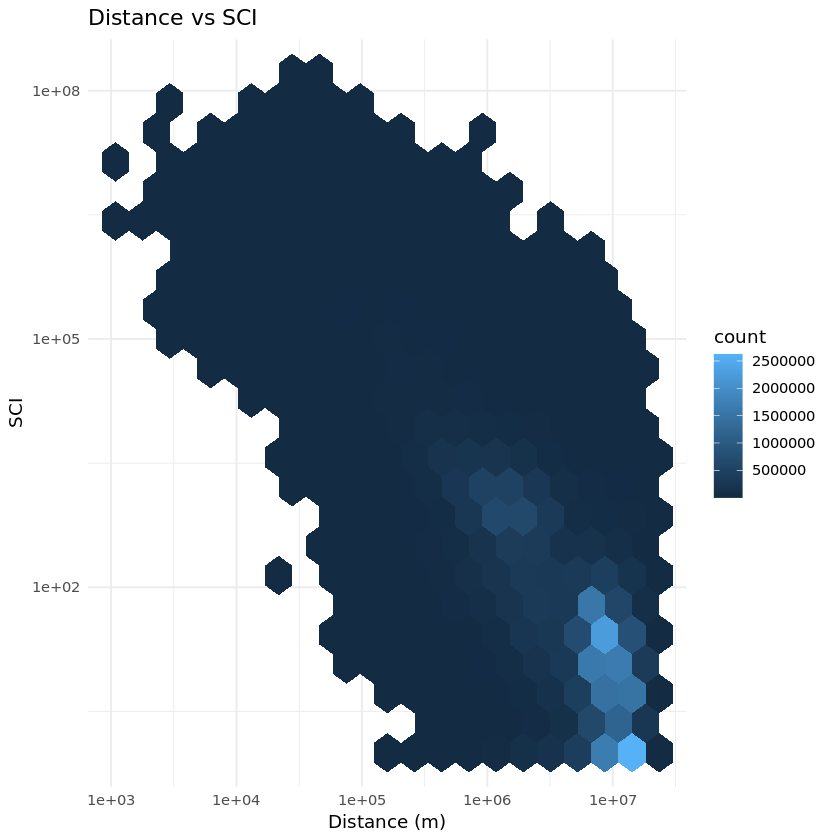

In [6]:
ggplot(edges_dist, aes(x = distance, y = weight)) + 
      geom_hex(bins = 20) +
      scale_x_log10() +
      scale_y_log10() +
      xlab("Distance (m)") +
      ylab("SCI") +
      ggtitle("Distance vs SCI") +
      theme_minimal()
      